# Exploratory Data Analysis
Yelp has challenged Kagglers to build a model that automatically tags restaurants with multiple labels using a dataset of user-submitted photos. Currently, restaurant labels are manually selected by Yelp users when they submit a review. Selecting the labels is optional, leaving some restaurants un- or only partially-categorized.

In this notebook, we explore the data for this competition. The different datasets can be downloaded [here](https://www.kaggle.com/c/yelp-restaurant-photo-classification).

## 1. Load Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Business id to labels
df = pd.read_csv('data/train.csv', header = 0, names = ['business','labels']).dropna()
# Photo id to business id for the training dataset
photo2biz_train = pd.read_csv('data/train_photo_to_biz_ids.csv', header = 0, names = ['photo','business'])
# Photo id to business id for the test dataset
photo2biz_test = pd.read_csv('data/test_photo_to_biz.csv', header = 0, names = ['photo','business'])

## 2. Data Processing

The `train.csv` file maps `business` to `labels`. There are nine different labels:
* 0 = good_for_lunch
* 1 = good_for_dinner
* 2 = takes_reservations
* 3 = outdoor_seating
* 4 = restaurant_is_expensive
* 5 = has_alcohol
* 6 = has_table_service
* 7 = ambience_is_classy
* 8 = good_for_kids

The original data frame is slightly modify to better access the labels of each business.

In [2]:
df['labels'] = df['labels'].apply(lambda x: list(sorted(int(t) for t in x.split())))
df.set_index('business', inplace=True)
df.head(n=10)

,labels
business,
1000,"[1, 2, 3, 4, 5, 6, 7]"
1001,"[0, 1, 6, 8]"
100,"[1, 2, 4, 5, 6, 7]"
1006,"[1, 2, 4, 5, 6]"
1010,"[0, 6, 8]"
101,"[1, 2, 3, 4, 5, 6]"
1011,"[2, 3, 5, 6]"
1012,"[1, 2, 3, 5, 6]"
1014,"[1, 2, 4, 5, 6]"


The `train_photo_to_biz_ids.csv` file maps the photo id (`photo`) to business id (`business`) for the training dataset. This information is added to the above data frame (`photos`). The total number of photos (`n_photo`) associated to each business is also included in the table.

In [3]:
biz2photos_train = photo2biz_train.groupby('business')['photo'].apply(list)
df['photos'] = biz2photos_train
df['n_photos'] = biz2photos_train.apply(len)

df.head(n=10)

,labels,photos,n_photos
business,,,
1000,"[1, 2, 3, 4, 5, 6, 7]","[438623, 325966, 227692, 407856, 368729, 16319...",54
1001,"[0, 1, 6, 8]","[298536, 20346, 8457, 308694, 349310, 407838, ...",9
100,"[1, 2, 4, 5, 6, 7]","[338465, 328433, 243861, 361777, 127198, 46652...",84
1006,"[1, 2, 4, 5, 6]","[46472, 341947, 396253, 75316, 42330, 244095, ...",22
1010,"[0, 6, 8]","[118251, 219940, 27517, 8578, 148347, 433559, ...",11
101,"[1, 2, 3, 4, 5, 6]","[13736, 393696, 286907, 86169, 243460, 254663,...",121
1011,"[2, 3, 5, 6]","[372371, 116870, 411981, 208597, 127752, 18839...",70
1012,"[1, 2, 3, 5, 6]","[287385, 232258, 388225, 151345, 417121, 32754...",37
1014,"[1, 2, 4, 5, 6]","[407910, 33911, 269241, 374218, 256236, 296370...",32


In [4]:
print('There are %d businesses in the training dataset' % len(df))
print('There are %d photos in the training dataset' % df['n_photos'].sum())
print('There are %d photos per business on average' % df['n_photos'].mean())

There are 1996 businesses in the training dataset
There are 234545 photos in the training dataset
There are 117 photos per business on average


The `test_photo_to_biz.csv` file maps the photo id (`photo`) to business id (`business`) for the test dataset.

In [5]:
biz2photos_test = photo2biz_test.groupby('business')['photo'].apply(list).to_dict()
biz_test = list(biz2photos_test.keys())
print('There are %d businesses in the test dataset.' % len(biz_test))

There are 10000 businesses in the test dataset.


In [6]:
labels = {'0': 'good_for_lunch',
          '1': 'good_for_dinner',
          '2': 'takes_reservations',
          '3': 'outdoor_seating',
          '4': 'restaurant_is_expensive',
          '5': 'has_alcohol',
          '6': 'has_table_service',
          '7': 'ambience_is_classy',
          '8': 'good_for_kids'}

def encode_label(l):
    tags = np.zeros(9)
    for i in l:
        tags[i] = 1
    return tags

def decode_label(x):
    return tuple(np.where(x==1)[0])

train_labels = np.vstack(df['labels'].apply(encode_label))

## 3. Visualization

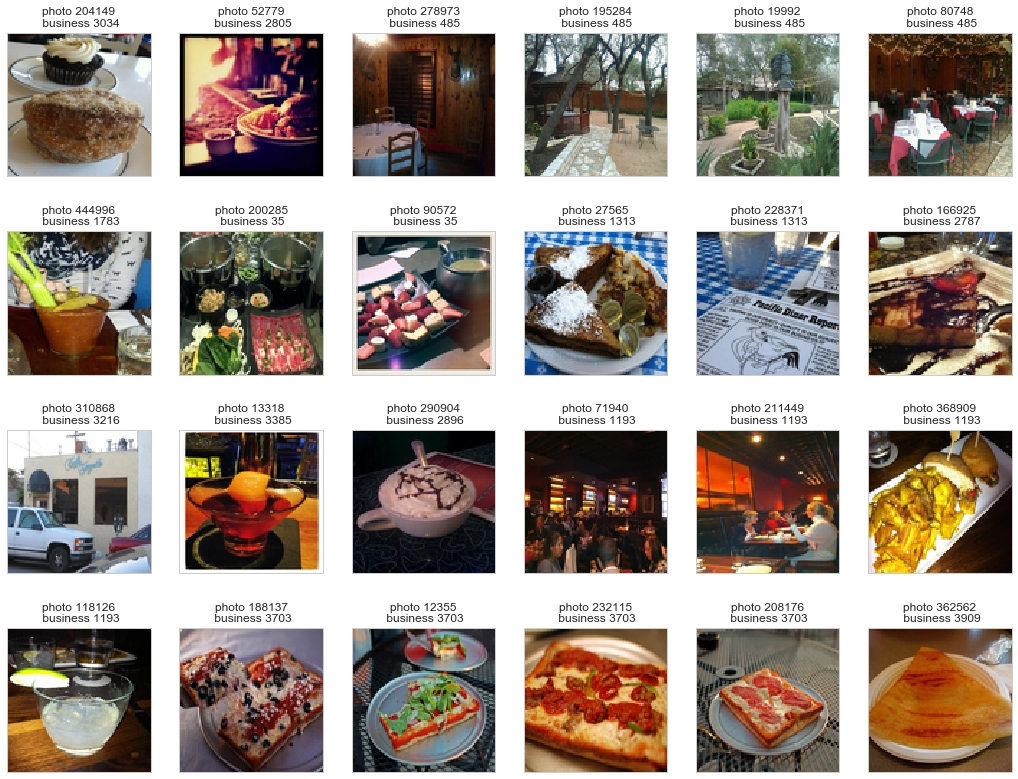

In [7]:
# Display the first 24 images of the training dataset
fig = plt.figure(figsize = (18,14))
for i in range(24):
    img = Image.open('data/train_photos/' + str(photo2biz_train.loc[i][0]) + '.jpg')
    img = img.resize((100, 100), Image.ANTIALIAS)
    ax = fig.add_subplot(4, 6, i+1, xticks = [], yticks = [])
    ax.set_title('photo ' + str(photo2biz_train.loc[i][0]) + '\n business ' + str(photo2biz_train.loc[i][1]))
    ax.imshow(img)

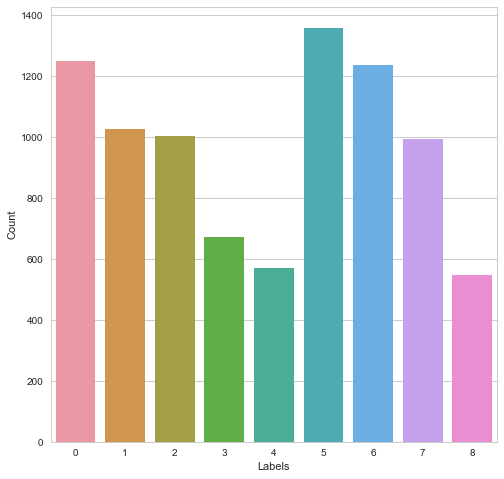

In [8]:
# Histogram of labels
fig = plt.figure(figsize = (8,8))
ax = sns.barplot(x=list(labels.keys()), y=list(np.sum(train_labels, axis = 0)))
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.show()

good_for_dinner, takes_reservations, outdoor_seating, restaurant_is_expensive, has_alcohol, has_table_service


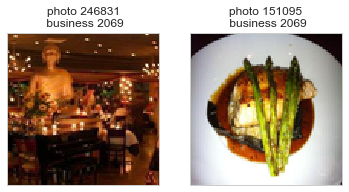

In [9]:
# Display photos of the business with the lowest number of photos
entry = df['n_photos'].argmin()

print(", ".join([labels[str(l)] for l in df.loc[entry]['labels']]))

fig = plt.figure(figsize = (6,4))
for i in range(df.loc[entry].n_photos):
    img = Image.open('data/train_photos/' + str(df.loc[entry]['photos'][i]) + '.jpg')
    img = img.resize((100, 100), Image.ANTIALIAS)
    ax = fig.add_subplot(1, df.loc[entry].n_photos, i+1, xticks = [], yticks = [])
    ax.set_title('photo ' + str(df.loc[entry]['photos'][i]) + '\n business ' + str(entry))
    ax.imshow(img)